<a href="https://www.kaggle.com/tush7301/watson?scriptVersionId=90349051" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/contradictory-my-dear-watson/sample_submission.csv
/kaggle/input/contradictory-my-dear-watson/train.csv
/kaggle/input/contradictory-my-dear-watson/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

2022-03-17 10:54:23.670627: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-03-17 10:54:23.670743: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
df_train = pd.read_csv('/kaggle/input/contradictory-my-dear-watson/train.csv')
df_test = pd.read_csv('/kaggle/input/contradictory-my-dear-watson/test.csv')

In [4]:
df_train = df_train.iloc[0:6000,:]
df_test = df_test.iloc[0:2500:]

In [5]:
df_train.shape

(6000, 6)

In [6]:
df_test.shape

(2500, 5)

In [7]:
df_train.describe(include='all')

,id,premise,hypothesis,lang_abv,language,label
count,6000,6000,6000,6000,6000,6000.000000
unique,6000,4899,6000,15,15,NaN
top,5130fd2cb5,right just get you away from the everyday thin...,The rules developed in the interim were put to...,en,English,NaN
freq,1,3,1,3394,3394,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.985833
std,NaN,NaN,NaN,NaN,NaN,0.822443
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,2.000000


In [8]:
df_train=df_train.drop('id', axis=1)
df_train.head()

,premise,hypothesis,lang_abv,language,label
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [9]:
df_test.describe(include='all')

,id,premise,hypothesis,lang_abv,language
count,2500,2500,2500,2500,2500
unique,2500,2293,2500,15,15
top,c6d58c3f69,yeah i was in Peru Peru but um i there weren't...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",en,English
freq,1,3,1,1410,1410


In [10]:
df_train=df_train.drop('language',axis=1)
df_test=df_test.drop('language',axis=1)

In [11]:
df_train.head()

,premise,hypothesis,lang_abv,label
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,0
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,2
2,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,0
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,0
4,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,1


In [12]:
df_test.head()

,id,premise,hypothesis,lang_abv
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru


<AxesSubplot:xlabel='lang_abv', ylabel='count'>

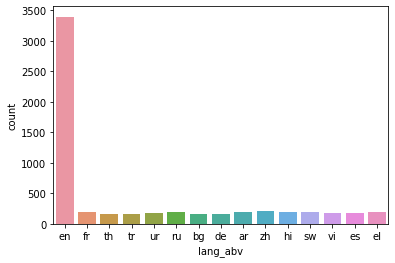

In [13]:
sns.countplot(x='lang_abv', data=df_train)

<AxesSubplot:ylabel='None'>

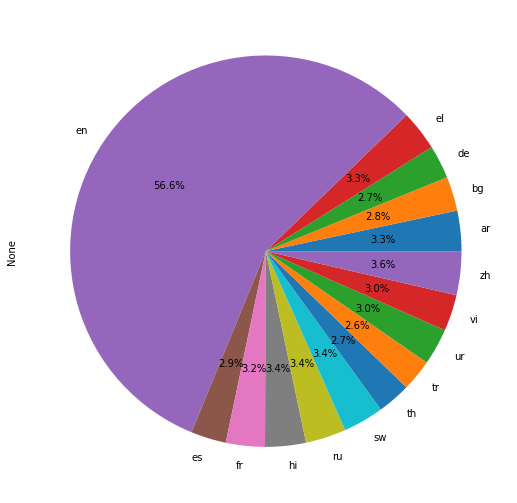

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
df_train.groupby('lang_abv').size().plot(kind='pie', autopct='%1.1f%%')

In [15]:
from transformers import BertTokenizer, TFBertModel, TFAutoModel,AutoTokenizer
model_name ='joeddav/xlm-roberta-large-xnli'
tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/734 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

In [16]:
def encode_premise_sentence(s):
    tokens=[]
    tokens.append('[CLS]')
    tokens+=list(tokenizer.tokenize(s))
    return tokenizer.convert_tokens_to_ids(tokens)
encode_premise_sentence("tusharmittal")

[3, 101852, 147, 4007, 1803]

In [17]:
def encode_hypo_sentence(s):
    tokens=[]
    tokens.append('[sep]')
    tokens+=list(tokenizer.tokenize(s))
    tokens.append('[sep]')
    return tokenizer.convert_tokens_to_ids(tokens)
encode_premise_sentence("tusharmittal")

[3, 101852, 147, 4007, 1803]

In [18]:
tokenized=[]
for i in range(len(df_train)):
    pre=encode_premise_sentence(df_train['premise'][i])
    hyp=encode_hypo_sentence(df_train['hypothesis'][i])
    tokenized.append(pre+hyp)
df_train['tokenized']=tokenized
df_train.head()

,premise,hypothesis,lang_abv,label,tokenized
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,0,"[3, 136, 6097, 24626, 3542, 90698, 23, 26168, ..."
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,2,"[3, 32255, 621, 37348, 450, 642, 148, 56644, 1..."
2,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,0,"[3, 5581, 69332, 37899, 3739, 91362, 9, 16161,..."
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,0,"[3, 398, 3714, 1836, 831, 25, 18, 6183, 65922,..."
4,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,1,"[3, 6976, 114538, 171936, 18379, 101830, 14435..."


In [19]:
mask=[]
for i in range(len(df_train)):
    padded_seq=tokenizer(df_train['premise'][i],df_train['hypothesis'][i], padding=True,add_special_tokens = True)
    mask.append(padded_seq)

In [20]:
df_train_panda = df_train
df_train_panda['masked'] = mask
df_train_panda.head(5)

,premise,hypothesis,lang_abv,label,tokenized,masked
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,0,"[3, 136, 6097, 24626, 3542, 90698, 23, 26168, ...","[input_ids, attention_mask]"
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,2,"[3, 32255, 621, 37348, 450, 642, 148, 56644, 1...","[input_ids, attention_mask]"
2,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,0,"[3, 5581, 69332, 37899, 3739, 91362, 9, 16161,...","[input_ids, attention_mask]"
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,0,"[3, 398, 3714, 1836, 831, 25, 18, 6183, 65922,...","[input_ids, attention_mask]"
4,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,1,"[3, 6976, 114538, 171936, 18379, 101830, 14435...","[input_ids, attention_mask]"


In [21]:
max_len = 236 

def build_model():
    encoder = TFAutoModel.from_pretrained('joeddav/xlm-roberta-large-xnli')
  
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")  
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
 
    embedding = encoder([input_word_ids, input_mask])[0] 
    output = tf.keras.layers.Dense(3, activation='softmax')(embedding[:,0,:])
    model = tf.keras.Model(inputs=[input_word_ids, input_mask], outputs=output) 
    model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
    
    return model

In [22]:
def input_convert(data):
    inputs={
        'input_word_ids':[],
        'input_mask':[]
    }
    for each in data:
        inputs['input_word_ids'].append(each['input_ids'])
        inputs['input_mask'].append(each['attention_mask'])
        
    inputs['input_word_ids']= tf.ragged.constant( inputs['input_word_ids']).to_tensor()
    inputs['input_mask']= tf.ragged.constant( inputs['input_mask']).to_tensor()
    return inputs

In [27]:
df_train_panda_input=input_convert(df_train_panda['masked'].values)
for key in df_train_panda_input.keys():
    df_train_panda_input[key] = df_train_panda_input[key][:,:max_len]

In [28]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    
    strategy = tf.distribute.experimental.TPUStrategy
except ValueError:
    strategy = tf.distribute.get_strategy() 
    print('Number of replicas:', strategy.num_replicas_in_sync) 

2022-03-17 10:56:47.454477: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job worker -> {0 -> 10.0.0.2:8470}
2022-03-17 10:56:47.454545: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:30043}
2022-03-17 10:56:47.456695: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job worker -> {0 -> 10.0.0.2:8470}
2022-03-17 10:56:47.456863: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:30043}


In [29]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
  tpu = None
  gpus = tf.config.experimental.list_logical_devices("GPU")

if tpu:
  tf.tpu.experimental.initialize_tpu_system(tpu)
  strategy = tf.distribute.experimental.TPUStrategy(tpu,)  
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
  strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
  print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
  strategy = tf.distribute.get_strategy() 
  print('Running on single GPU ', gpus[0].name)
else:
  strategy = tf.distribute.get_strategy() 
  print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on TPU  ['10.0.0.2:8470']
Number of accelerators:  8


In [30]:
with strategy.scope(): 
    model = build_model() 
    model.summary()      

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some layers from the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing TFXLMRobertaModel: ['classifier']
- This IS expected if you are initializing TFXLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLMRobertaModel were initialized from the model checkpoint at joeddav/xlm-roberta-large-xnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 236)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 236)]        0                                            
__________________________________________________________________________________________________
tfxlm_roberta_model (TFXLMRober TFBaseModelOutputWit 559890432   input_word_ids[0][0]             
                                                                 input_mask[0][0]                 
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 1024)         0           tfxlm_roberta_model[0][0]    

In [31]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
model.fit(df_train_panda_input, df_train_panda['label'].values, epochs = 5, verbose = 1, validation_split = 0.01,
         batch_size=16*strategy.num_replicas_in_sync
          ,callbacks=[early_stop]
         ) 

Epoch 1/5


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:430: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 256002048 elements. This may consume a large amount of memory.
  num_elements)


47/47 [==============================] - 281s 3s/step - loss: 0.3756 - accuracy: 0.8700 - val_loss: 0.1943 - val_accuracy: 0.9333
Epoch 2/5
47/47 [==============================] - 20s 426ms/step - loss: 0.1517 - accuracy: 0.9530 - val_loss: 0.2729 - val_accuracy: 0.9333
Epoch 3/5
47/47 [==============================] - 20s 427ms/step - loss: 0.0901 - accuracy: 0.9727 - val_loss: 0.1592 - val_accuracy: 0.9333
Epoch 4/5
47/47 [==============================] - 20s 426ms/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.2604 - val_accuracy: 0.9500
Epoch 5/5
47/47 [==============================] - 20s 427ms/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.3046 - val_accuracy: 0.9333


In [33]:
df_test = pd.read_csv("../input/contradictory-my-dear-watson/test.csv")

In [34]:
tokenized=[]
for i in range(len(df_test)):
    pre=encode_premise_sentence(df_test['premise'][i])
    hyp=encode_hypo_sentence(df_test['hypothesis'][i])
    tokenized.append(pre+hyp)
df_test['tokenized']=tokenized


mask=[]
for i in range(len(df_test)):
    padded_seq=tokenizer(df_test['premise'][i],df_test['hypothesis'][i], padding=True,add_special_tokens = True)
    mask.append(padded_seq)
    
df_test['masked'] = mask


df_test_panda_input=input_convert(df_test['masked'].values)
for key in df_test_panda_input.keys():
    df_test_panda_input[key] = df_test_panda_input[key][:,:max_len]




In [35]:
df_test_panda_input

{'input_word_ids': <tf.Tensor: shape=(5195, 236), dtype=int32, numpy=
 array([[     0,    676,  20658, ...,      0,      0,      0],
        [     0,   2433,   1638, ...,      0,      0,      0],
        [     0,     82,  10804, ...,      0,      0,      0],
        ...,
        [     0, 115316,   4696, ...,      0,      0,      0],
        [     0,  56112,     25, ...,      0,      0,      0],
        [     0,    360,  34854, ...,      0,      0,      0]], dtype=int32)>,
 'input_mask': <tf.Tensor: shape=(5195, 236), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [36]:
predictions = [np.argmax(i) for i in model.predict(df_test_panda_input)] 

In [37]:
submission = df_test.id.copy().to_frame()
submission['prediction'] = predictions

In [38]:
submission.head()

,id,prediction
0,c6d58c3f69,2
1,cefcc82292,1
2,e98005252c,0
3,58518c10ba,1
4,c32b0d16df,1


In [39]:
submission.shape

(5195, 2)

In [40]:
submission.to_csv("submission.csv", index = False)